# HW5
## Question 3
### part c

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def y_0(x_in, a=1.0, L=2.0):
    x=x_in*L
    if np.any(x > L) | np.any(x < 0):
        print(f"Invalid input: {x} is not in range of [0,{L}]")
        return
    
    return np.where(x > L/2, (L-x)*2*a/L, x*2*a/L)

In [3]:
def y_n(x,n,a,L):
    if n%2 == 0:
        return np.zeros(len(x))
    else:
        return (8*a/(n*math.pi)**2) * (-1)**((n-1)/2) * np.sin(n*math.pi*x/L)

In [4]:
def y_n0(x_in,n, a=1.0,L=2.0,):
    x = x_in*L
    if np.any(x > L) | np.any(x < 0):
        print(f"Invalid input: {x} is not in range of [0,{L}]")
        return
    
    return np.sum(np.array([y_n(x,N,a,L) for N in range(n+1)]), axis=0)

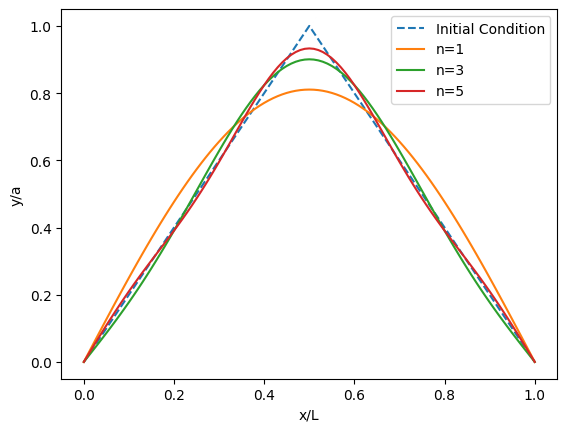

In [5]:
x=np.arange(0,1.01,0.01)

fig, ax = plt.subplots()
ax.plot(x, y_0(x), label="Initial Condition", linestyle="--")
ax.plot(x, y_n0(x,1), label="n=1")
ax.plot(x, y_n0(x,3), label="n=3")
ax.plot(x, y_n0(x,5), label="n=5")

ax.set_xlabel("x/L")
ax.set_ylabel("y/a")

plt.legend()
plt.show()


## Question 4

### part a
From general solution to the wave function,
$$y_n(x,t) = A_n \sin(\frac{\omega_n}{v}x) \cos (\omega_n t - \delta_n)$$

### part b
Unpack $\omega_n$
$$
\begin{align*}
y_n(x,t) &= A_n \sin (\frac{n \pi v}{vL}x) \cos(2 \pi f_n t - \delta_n) \\
&= A_n \sin(\frac{n \pi x}{L}) \cos (2 \pi n f_1 t - \delta_n) \\
&= A_n \sin (\frac{n \pi x}{L}) \cos (2 \pi n \frac{t}{T_1}-\delta_n)
\end{align*}
$$

We can further define our position variable to $X=x/L$, then 
$$ y_n(X, t) =  A_n \sin (n \pi X) \cos (2 \pi n \frac{t}{T_1}-\delta_n)

In [6]:
# Define a functon with L=1.0m and T1 = 1.0s
def y_n(X,t,n,A_n,d_n, L=1.0, T1=1.0):
    x = X*L
    return A_n*np.sin(n*math.pi*x/L)*np.cos(2*math.pi*n*t/T1 - d_n) 

### part c

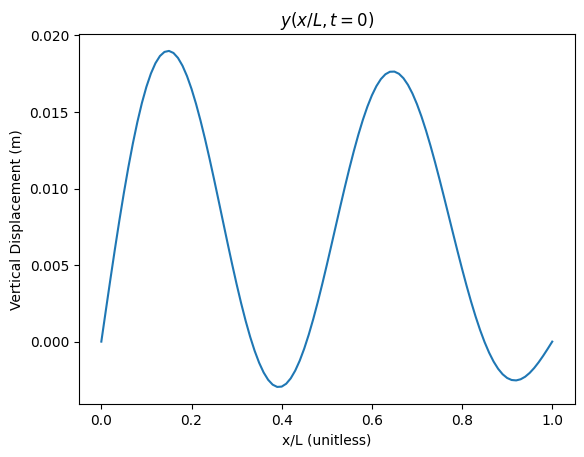

In [7]:
X = np.arange(0,1.01,0.01) # [m]

L = 1.0 # [m]
T1 = 1.0 # [s]

y1 = y_n(X, 0, 1, 0.01*L, 0, L, T1)
y3 = y_n(X, 0, 3, 0.005*L, 0, L, T1)
y4 = y_n(X, 0, 4, 0.01*L, 0, L, T1)

ytot = np.sum(np.array([y1, y3, y4]), axis=0)

plt.plot(X, ytot)
plt.xlabel("x/L (unitless)")
plt.ylabel("Vertical Displacement (m)")
plt.title(r"$y(x/L,t=0)$")
plt.show()

### part d

In [8]:
from matplotlib import animation, rc
rc('animation', html='jshtml') # or 'html5'

In [9]:
def y_tot(X,t,N,A_n,d_n,L,T1):
    return np.sum(np.array([y_n(X,t,n,A_n,d_n,L,T1) for n in N]), axis=0)

In [10]:
L = 1.0 # [m]
T1 = 1.0 # [s]

tp = np.arange(0,T1, 0.02) # Hence, [s]
X = np.arange(0,1.01,0.01) # This is unitless, as it is x/L
N = np.array([1,3,4])

fig = plt.figure()
plt.xlim(0,1.01)
plt.ylim(-0.03,0.03)
plt.xlabel("x/L (unitless)")
plt.ylabel("Vertical Displacement (m)")
plt.title(r"$y(x/L,t)$ for one period")
data, = plt.plot([],[])

def init():
  data.set_data(X, y_tot(X,0,N,0.01*L,0,L,T1))
  return data,

def animate(i):
  t = tp[i]
  ytot = y_tot(X,t,N,0.01*L,0,L,T1)
  data.set_data(X, ytot)
  return data,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(tp), interval=50, blit=True)

plt.close(fig)  # This hides the original plot.
anim